### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import copy
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/insurance (2).csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Applying Benford's Law on Charges column to check the creditibility

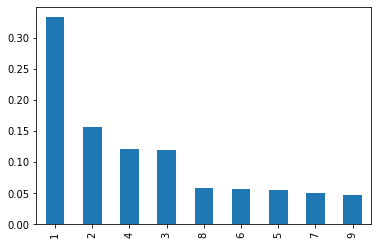

In [ ]:
df = copy.deepcopy(data)
df['running_digit'] = df['charges'].apply(lambda x:str(x)[0])
(df['running_digit'].value_counts()/df['running_digit'].value_counts().sum()).plot(kind = 'bar')

##### 1. Benford's law, also known as the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation that in many real-life sets of numerical data, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. If the digits were distributed uniformly, they would each occur about 11.1 % of the time.
##### 2.Hence the data gives follows statistics.

#### To get the info about the data types of each column :

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Data types of the Following Columns :
    Age : integer
    Sex : Object (String)
    BMI : float (decimal quantity)
    Children : integer
    Smoker : Object (String)
    Region : Object (String)
    Charges : Float (decimal quantity)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Shape of the dataframe :

In [ ]:
print(data.shape)
print("There are {} rows with {} columns".format(data.shape[0],data.shape[1]))

(1338, 7)
There are 1338 rows with 7 columns


#### For finding the missing values

In [ ]:
print(data.isnull().sum()) ## Inference : No missing Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### To find the duplicate rows and drop them

In [ ]:
data.duplicated().sum()
data.drop_duplicates(inplace = True)
print(data.shape)  ## Data shape is 1337 after dropping one duplicate row.

(1337, 7)


### Exploratory Data Analysis

In [ ]:
data['age'].value_counts() ## Range 18 - 64

18    69
19    67
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [ ]:
import plotly.express as px
px.scatter(data, x="age", y="charges", color="smoker", facet_col="sex", facet_row="region",width=1400, height=700)

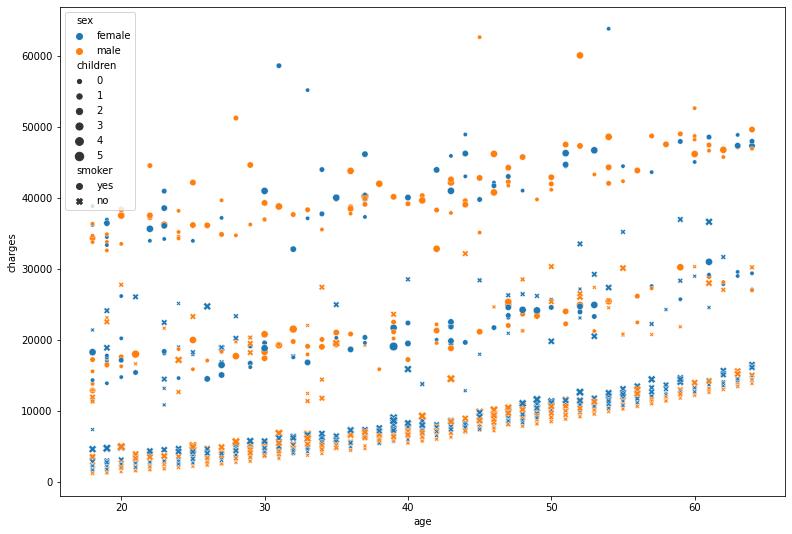

In [ ]:
plt.figure(figsize = (13,9))
sns.scatterplot(data['age'],data['charges'],hue = data['sex'],style = data['smoker'],size = data['children'])

#### Categorical Data

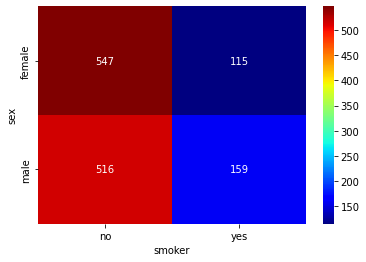

In [ ]:
sns.heatmap(pd.crosstab(data['sex'],data['smoker']), cmap = 'jet',annot = True, fmt='g')

##### 1. Probability that an individual is male given that individual is a smoker is greater than probability that individual is female.
##### 2. There is a greater number of male smokers.

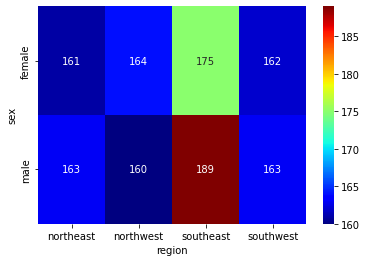

In [ ]:
sns.heatmap(pd.crosstab(data['sex'],data['region']), cmap = 'jet',annot = True, fmt='g')

##### 1. There are more number of people from SOUTHEAST.
##### 2. The gender ratio is nearly ~1 IN SOUTHWEST region.

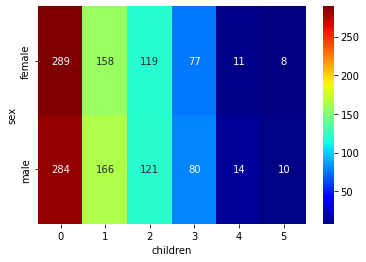

In [ ]:
sns.heatmap(pd.crosstab(data['sex'],data['children']), cmap = 'jet',annot = True, fmt='g')

##### 1. Most parents have 2 or less than 2 children.
##### 2. The more number of individual having no children are below the age of 23.

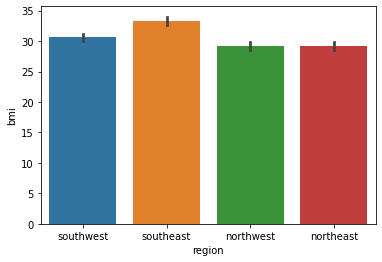

In [ ]:
sns.barplot(data['region'], data['bmi'])

##### 1. The NORTHWEST and NORTHEAST region have most number of fit individuals.
##### 2. The people in SOUTHEAST region adopts unhealthy eating habits contributing to increase in Obesity rates.

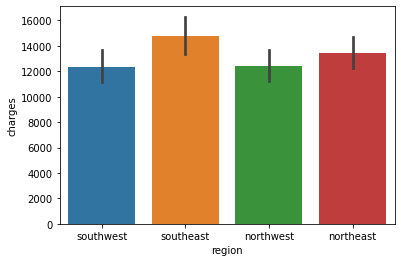

In [ ]:
sns.barplot(data['region'], data['charges'])

##### 1. SOUTHEAST people have the greatest charges.
##### 2. WEST region people have lesser charges than their counterparts.

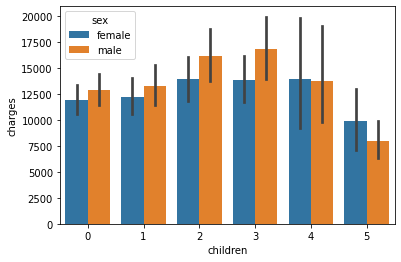

In [ ]:
sns.barplot(data['children'], data['charges'], hue = data['sex'])

##### 1. Male individuals having 2+ children have the largest charges.
##### 2. Individuals have 5 children usually have less charges.

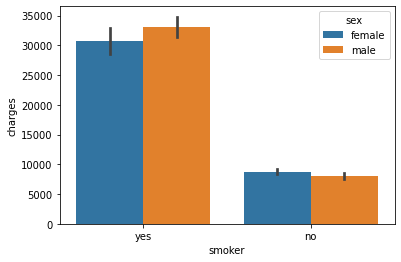

In [ ]:
sns.barplot(data['smoker'], data['charges'],hue = data['sex'])

##### 1. There is a greater number of population who smokes.
##### 2. Male population smokes more than female population.
##### 3. The contribution of male and female population in either "smoker" or "non-smoker" is equally same.
##### 4. It can be inferenced that people who smokes usually have more charges than the non smoking population.

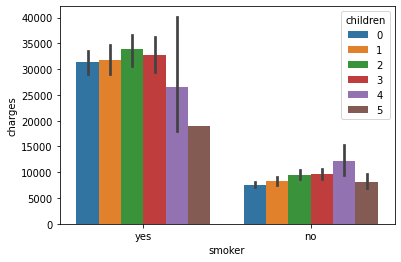

In [ ]:
sns.barplot(data['smoker'], data['charges'],hue = data['children'])

##### 1. There is no clear inference between smoking and number of children as such.

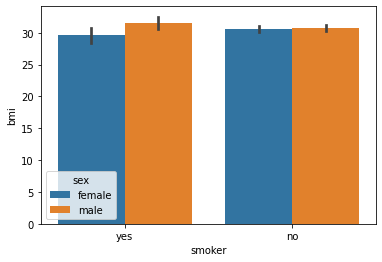

In [ ]:
sns.barplot(data['smoker'], data['bmi'],hue = data['sex'])

##### 1. Male population who smokes have more mean BMI (unhealthy indicator) than the non smoking population.

#### Pair Plots

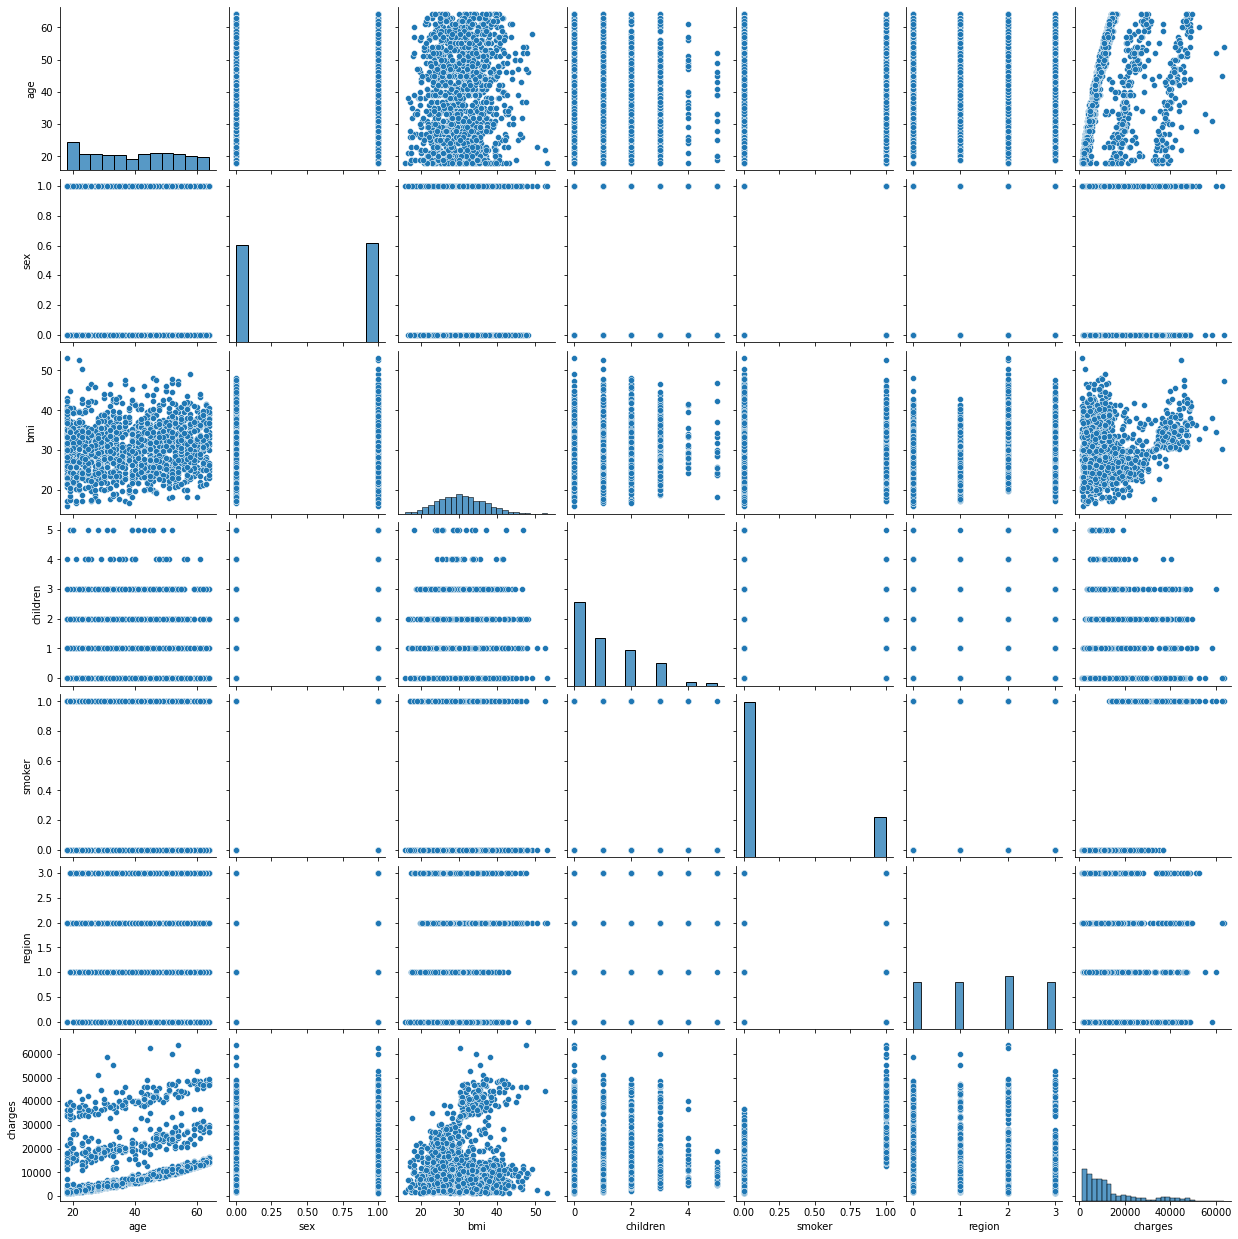

In [ ]:
data_encoded = copy.deepcopy(data)
data_encoded.loc[:,['sex', 'smoker', 'region']] = data_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(data_encoded)  #pairplot
plt.show()

##### 1. There is very great correlation between smoker and charges.
##### 2. From the plots it can be inferenced that older age -> higher charges.

In [ ]:
data_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


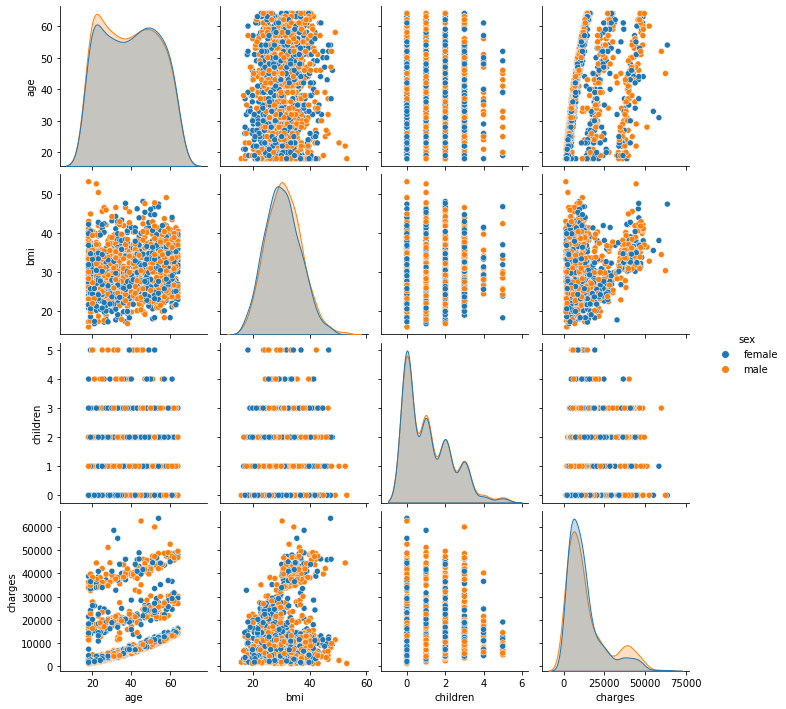

In [ ]:
# pairplot with hue sex 
sns.pairplot(data, hue ='sex') 
plt.show() 

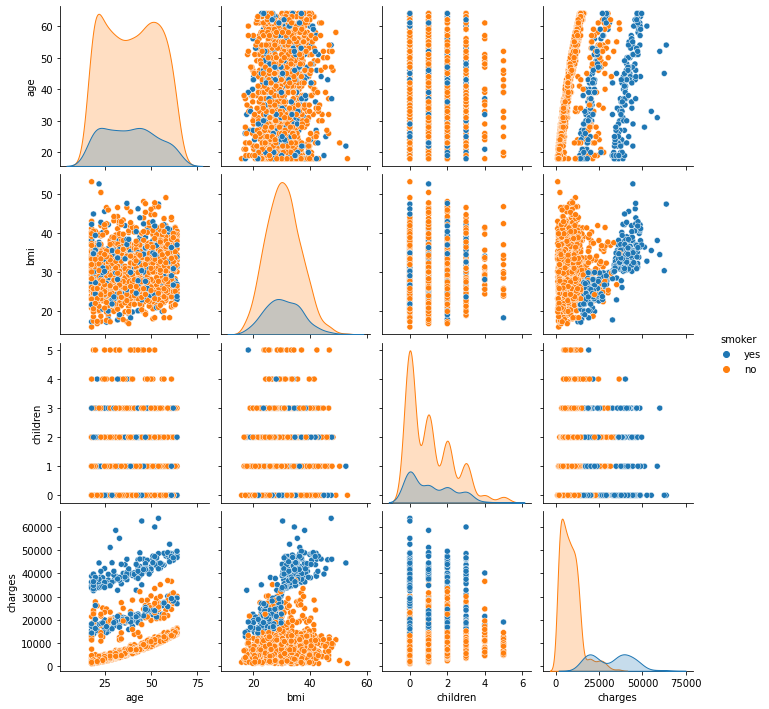

In [ ]:
# pairplot with hue sex 
sns.pairplot(data, hue ='smoker') 
plt.show() 

### Distribution of Columns

#### Age Column

In [ ]:
print(data['age'].mean())
print(data['age'].median())
print(data['age'].max())

39.222139117427076
39.0
64


##### Normal distribution

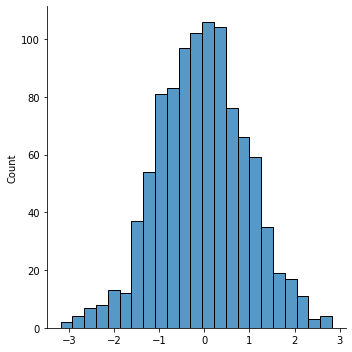

In [ ]:
norm = np.random.normal(size = 1000)
sns.displot(norm)

24.0 87.0 -9.0
The following are the outliers in the boxplot:Series([], Name: age, dtype: int64)


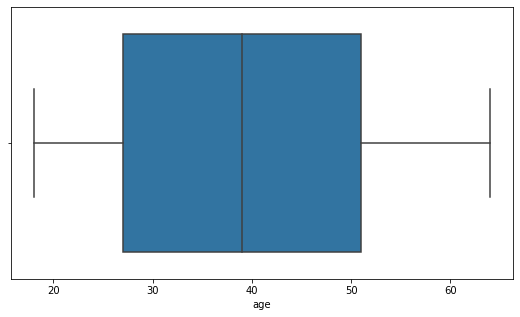

In [ ]:
plt.figure(figsize = (9, 5))
sns.boxplot(data['age'])
# finding the 1st quartile
q1 = np.quantile(data['age'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data['age'], 0.75)
med = np.median(data['age'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


outliers = data['age'][(data['age'] <= lower_bound) | (data['age'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The skewness of the distribution is 0.054780773126998195


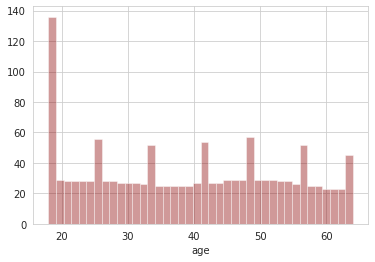

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['age'].dropna(),kde = False,bins = 40,color = 'darkred')
print('The skewness of the distribution is {}'.format(data['age'].skew()))

#### BMI (Body Mass Index)

In [ ]:
print(data['bmi'].mean())
print(data['bmi'].median())
print(data['bmi'].max())

30.663451757666405
30.4
53.13


8.410000000000004 47.31500000000001 13.674999999999994
The following are the outliers in the boxplot:
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


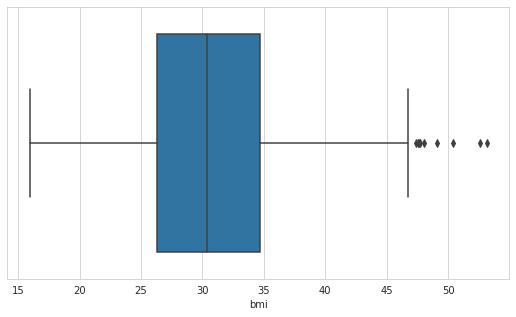

In [ ]:
plt.figure(figsize = (9, 5))
sns.boxplot(data['bmi'])
# finding the 1st quartile
q1 = np.quantile(data['bmi'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data['bmi'], 0.75)
med = np.median(data['bmi'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


outliers = data['bmi'][(data['bmi'] <= lower_bound) | (data['bmi'] >= upper_bound)]
print('The following are the outliers in the boxplot:\n{}'.format(outliers))

The skewness of the distribution is 0.28391419385321137


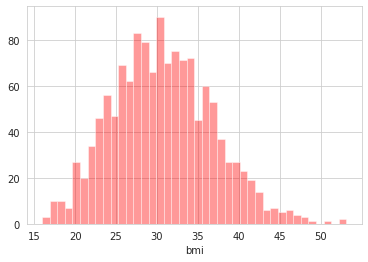

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['bmi'].dropna(),kde = False,bins = 40,color = 'red')
print('The skewness of the distribution is {}'.format(data['bmi'].skew()))

#### Charges

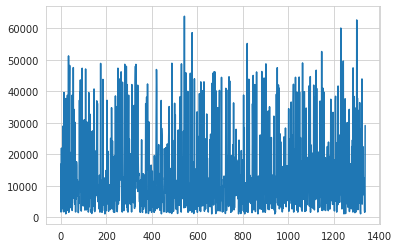

In [ ]:
plt.plot(data['charges'])

In [ ]:
print(data['charges'].mean())
print(data['charges'].median())
print(data['charges'].max())

13279.121486655948
9386.1613
63770.42801


11911.37345 34524.777625 -13120.716174999998
The total number of ouliers are : 139
The following are the outliers in the boxplot:
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


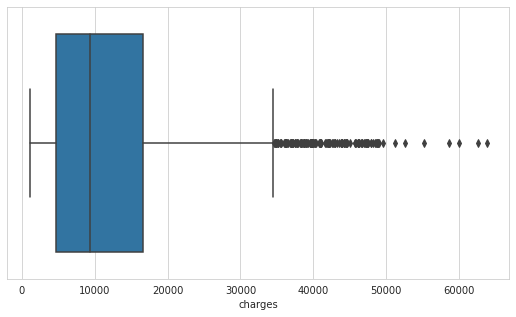

In [ ]:
plt.figure(figsize = (9, 5))
sns.boxplot(data['charges'])
# finding the 1st quartile
q1 = np.quantile(data['charges'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data['charges'], 0.75)
med = np.median(data['charges'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


outliers = data['charges'][(data['charges'] <= lower_bound) | (data['charges'] >= upper_bound)]
print('The total number of ouliers are : {}'.format(len(outliers)))
print('The following are the outliers in the boxplot:\n{}'.format(outliers))

The skewness of the distribution is 1.5153909108403483


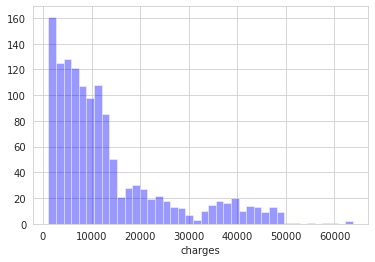

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['charges'].dropna(),kde = False,bins = 40,color = 'blue')
print('The skewness of the distribution is {}'.format(data['charges'].skew()))

In [ ]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283596
age,0.054719
charges,1.513690


##### 1. Charges are highly skewed with 139 outliers.
##### 2. Age distribution is basically Uniform within range of 18-64 having atleast skewness and 0 outliers.
##### 3. BMI (Body Mass Index) lies in between of Age and Charges in terms of skewness of the dataset.

#### One tail T-test for the inference based questions.

#####Do charges of people who smoke differ significantly from the people who don't? 


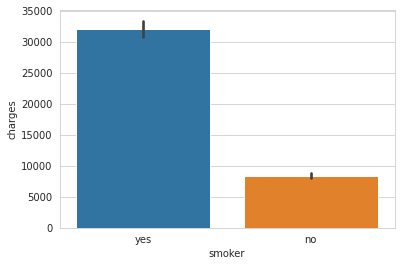

In [ ]:
sns.barplot(data['smoker'], data['charges'])

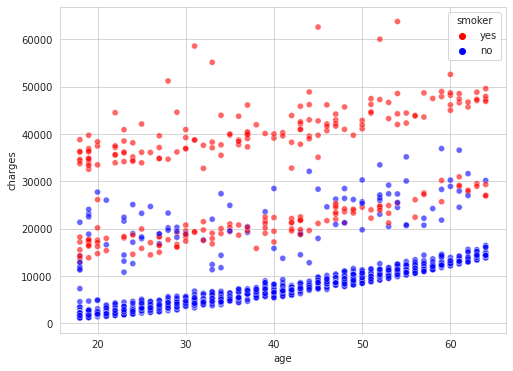

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['age'], data['charges'],hue=data['smoker'],palette= ['red','blue'] ,alpha=0.6)
plt.show()

##### From the graph it is clearly visible that people who don't smoke usually have less charges compared to the people who don't smoke. Let us run the one tail T-test for 95% confidence level.

In [ ]:
Ho = "Charges of smoker and non-smoker are same"   ## Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same" ## Alternative Hypothesis

x = np.array(data[data.smoker == 'yes'].charges) 
# Selecting charges corresponding to smokers.
y = np.array(data[data.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers.

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

1.4067220949376498e-282


##### Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers.

####  Does bmi of males differ significantly from that of females? 


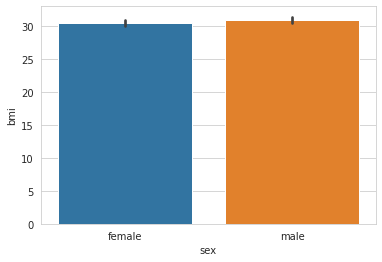

In [ ]:
sns.barplot(data['sex'], data['bmi'])

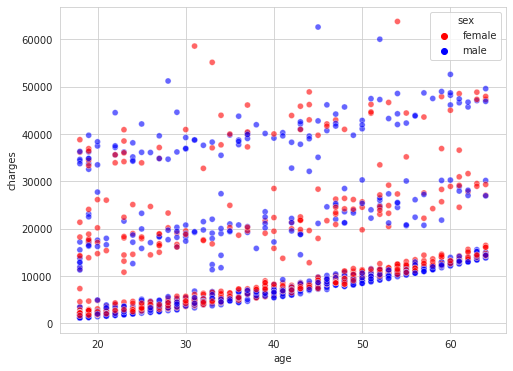

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['age'], data['charges'],palette= ['red','blue'] ,alpha=0.6,hue=data['sex'])
plt.show()

In [ ]:
Ho = "Gender has no impact on bmi"   ## Null Hypothesis
Ha = "Gender has an impact on bmi"   ## Alternate Hypothesis

x = np.array(data[data.sex == 'male'].bmi)  
y = np.array(data[data.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08991704324931137


##### Accepting the null hypothesis as the p_value is greater than 0.05. It means that the gender distribution has no effect on the BMI of the people.

####  Is the proportion of smokers significantly different in different genders? 

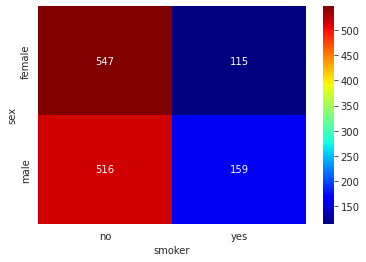

In [ ]:
sns.heatmap(pd.crosstab(data['sex'],data['smoker']), cmap = 'jet',annot = True, fmt='g')

#### Chi-square Test for categorical-categorical data

In [ ]:
Ho = "Gender has no effect on smoking habits" ## Null Hypothesis
Ha = "Gender has an effect on smoking habits" ## Alternate Hyypothesis

crosstab = pd.crosstab(data['sex'],data['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.0062765550120107375


##### Rejecting null hypothesis as the p_value is lesser than 0.05. Hence,smoking habits differs with the gender.

#### Is the distribution of bmi across women with no children, one child and two children, the same? 

In [ ]:
df = copy.deepcopy(data)

In [ ]:
df = df[(df['sex'] == 'female') & (df['children'] < 3)]


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


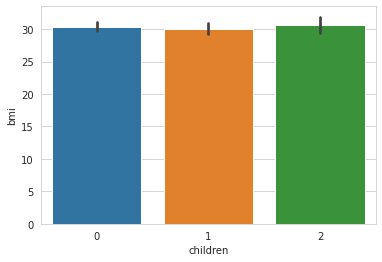

In [ ]:
sns.barplot(df['children'], df['bmi'])

#### Anova test

In [ ]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

df_temp = copy.deepcopy(data[data['sex'] == 'female'])

zero = df_temp[df_temp.children == 0]['bmi']
one = df_temp[df_temp.children == 1]['bmi']
two = df_temp[df_temp.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


##### Accepting the null hypothesis as the p_value is greater than 0.05.Hence,it tells the number of children is not effecting any difference in women bmi.